In [62]:
# Copyright 2020 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Overview

In this notebook, you will learn how to load, explore, visualize, and pre-process a time-series dataset. The output of this notebook is a processed dataset that will be used in following notebooks to build a machine learning model.

### Dataset

[CTA - Ridership - Daily Boarding Totals](https://data.cityofchicago.org/Transportation/CTA-Ridership-Daily-Boarding-Totals/6iiy-9s97): This dataset shows systemwide boardings for both bus and rail services provided by Chicago Transit Authority, dating back to 2001.

### Objective

The goal is to forecast future transit ridership in the City of Chicago, based on previous ridership.

## Install packages and dependencies

Restarting the kernel may be required to use new packages.

In [36]:
%pip install -U statsmodels scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


**Note:** To restart the Kernel, navigate to Kernel > Restart Kernel... on the Jupyter menu.

### Import libraries and define constants

In [37]:
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import grangercausalitytests

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [38]:
# Enter your project and region. Then run the  cell to make sure the
# Cloud SDK uses the right project for all the commands in this notebook.

PROJECT = 'My First Project' # REPLACE WITH YOUR PROJECT NAME 
REGION = 'us-west1-b' # REPLACE WITH YOUR REGION e.g. us-central1

#Don't change the following command - this is to check if you have changed the project name above.
assert PROJECT != 'your-project-name', 'Don''t forget to change the project variables!'

In [63]:
target = 'total_rides' # The variable you are predicting
target_description = 'Total Rides' # A description of the target variable
features = {'day_type': 'Day Type'} # Weekday = W, Saturday = A, Sunday/Holiday = U
ts_col = 'service_date' # The name of the column with the date field

raw_data_file = './CTA_-_Ridership_-_Daily_Boarding_Totals.csv'
processed_file = 'cta_ridership.csv' # Which file to save the results to

## Load data

In [46]:
# Import CSV file

df = pd.read_csv(raw_data_file, index_col=[ts_col], parse_dates=[ts_col])

In [47]:
# Model data prior to 2020 

df = df[df.index < '2020-01-01']

In [48]:
# Drop duplicates

df = df.drop_duplicates()

In [49]:
# Sort by date

df = df.sort_index()

## Explore data

In [50]:
# Print the top 5 rows

df.head()

,day_type,bus,rail_boardings,total_rides
service_date,,,,
2001-01-01,U,297192,126455,423647
2001-01-02,W,780827,501952,1282779
2001-01-03,W,824923,536432,1361355
2001-01-04,W,870021,550011,1420032
2001-01-05,W,890426,557917,1448343


### TODO 1: Analyze the patterns

* Is ridership changing much over time?
* Is there a difference in ridership between the weekday and weekends?
* Is the mix of bus vs rail ridership changing over time?

In [51]:
# Initialize plotting

register_matplotlib_converters() # Addresses a warning
sns.set(rc={'figure.figsize':(16,4)})

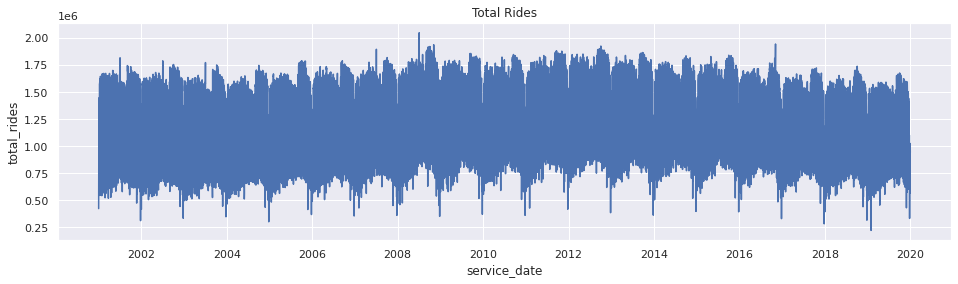

In [52]:
# Explore total rides over time

sns.lineplot(data=df, x=df.index, y=df[target]).set_title('Total Rides')
fig = plt.show()

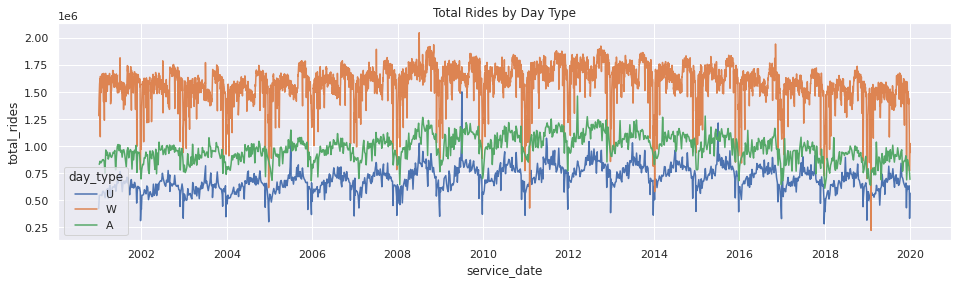

In [53]:
# Explore rides by day type: Weekday (W), Saturday (A), Sunday/Holiday (U)

sns.lineplot(data=df, x=df.index, y=df[target], hue=df['day_type']).set_title('Total Rides by Day Type')
fig = plt.show()

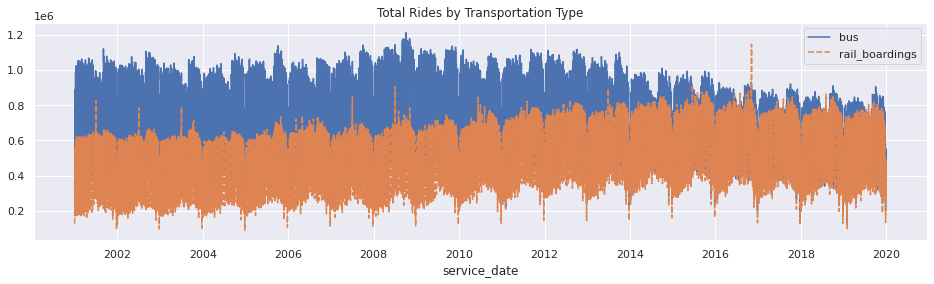

In [54]:
# Explore rides by transportation type

sns.lineplot(data=df[['bus','rail_boardings']]).set_title('Total Rides by Transportation Type')
fig = plt.show()

### TODO 2: Review summary statistics

* How many records are in the dataset?
* What is the average # of riders per day?

In [55]:
df[target].describe().apply(lambda x: round(x))

count       6939
mean     1368761
std       391443
min       222071
25%      1005394
50%      1548343
75%      1660947
max      2049519
Name: total_rides, dtype: int64

### TODO 3: Explore seasonality

* Is there much difference between months?
* Can you extract the trend and seasonal pattern from the data?

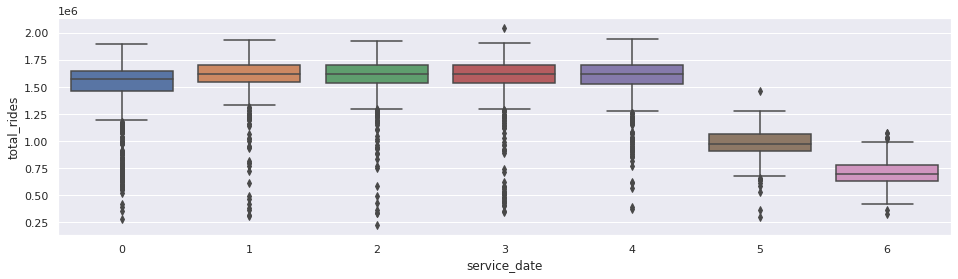

In [56]:
# Show the distribution of values for each day of the week in a boxplot:
# Min, 25th percentile, median, 75th percentile, max 

daysofweek = df.index.to_series().dt.dayofweek

fig = sns.boxplot(x=daysofweek, y=df[target])

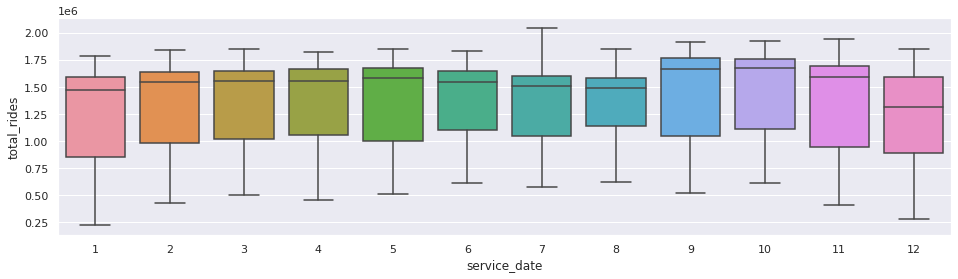

In [57]:
# Show the distribution of values for each month in a boxplot:

months = df.index.to_series().dt.month

fig = sns.boxplot(x=months, y=df[target])

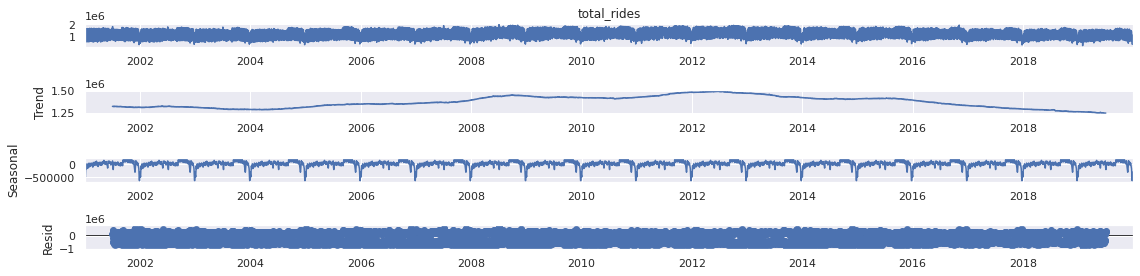

In [58]:
# Decompose the data into trend and seasonal components

result = seasonal_decompose(df[target], period=365)
fig = result.plot()

### Auto-correlation

Next, we will create an auto-correlation plot, to show how correlated a time-series is with itself. Each point on the x-axis indicates the correlation at a given lag. The shaded area indicates the confidence interval.

Note that the correlation gradually decreases over time, but reflects weekly seasonality (e.g. `t-7` and `t-14` stand out).

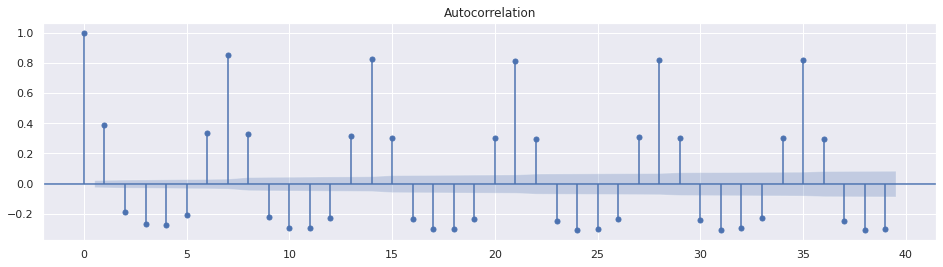

In [59]:
plot_acf(df[target])

fig = plt.show()

## Export data

This will generate a CSV file, which you will use in the next labs of this quest.
Inspect the CSV file to see what the data looks like.

In [60]:
df[[target]].to_csv(processed_file, index=True, index_label=ts_col)

## Conclusion

You've successfully completed the exploration and visualization lab.
You've learned how to:
* Create a query that groups data into a time series
* Visualize data
* Decompose time series into trend and seasonal components